# Objective: Build A CNN that can classify a cat or dog using image data

## Data Collection

*** All directories below are fake palcholders for actual ones on my computer to protect my privacy ***

In [1]:
#!wget --no-check-certificate \
#    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"

In [23]:
import os
import zipfile

local_zip = 'zipfile'
zip_ref = zipfile.ZipFile(local_zip,'r')
print(zip_ref.extractall('zipfolder'))
print(zip_ref.namelist())

None
['PetImages/Cat/', 'PetImages/Cat/0.jpg', 'PetImages/Cat/1.jpg', 'PetImages/Cat/10.jpg', 'PetImages/Cat/100.jpg', 'PetImages/Cat/1000.jpg', 'PetImages/Cat/10000.jpg', 'PetImages/Cat/10001.jpg', 'PetImages/Cat/10002.jpg', 'PetImages/Cat/10003.jpg', 'PetImages/Cat/10004.jpg', 'PetImages/Cat/10005.jpg', 'PetImages/Cat/10006.jpg', 'PetImages/Cat/10007.jpg', 'PetImages/Cat/10008.jpg', 'PetImages/Cat/10009.jpg', 'PetImages/Cat/1001.jpg', 'PetImages/Cat/10010.jpg', 'PetImages/Cat/10011.jpg', 'PetImages/Cat/10012.jpg', 'PetImages/Cat/10013.jpg', 'PetImages/Cat/10014.jpg', 'PetImages/Cat/10015.jpg', 'PetImages/Cat/10016.jpg', 'PetImages/Cat/10017.jpg', 'PetImages/Cat/10018.jpg', 'PetImages/Cat/10019.jpg', 'PetImages/Cat/1002.jpg', 'PetImages/Cat/10020.jpg', 'PetImages/Cat/10021.jpg', 'PetImages/Cat/10022.jpg', 'PetImages/Cat/10023.jpg', 'PetImages/Cat/10024.jpg', 'PetImages/Cat/10025.jpg', 'PetImages/Cat/10026.jpg', 'PetImages/Cat/10027.jpg', 'PetImages/Cat/10028.jpg', 'PetImages/Cat/10029

In [25]:
print(len(os.listdir(r'C:\Users\Srikar\Desktop\Jupyter Notebooks\kagglecatsanddogs_3667a\PetImages\Cat')))
print(len(os.listdir(r'C:\Users\Srikar\Desktop\Jupyter Notebooks\kagglecatsanddogs_3667a\PetImages\Dog')))

12501
12501


Creating directorires to place training & testing files 

In [32]:
os.mkdir('\cats-v-dogs')
os.mkdir('training')
os.mkdir('\testing')
os.mkdir('\cats')
os.mkdir('\dogs')
os.mkdir('\cats')
os.mkdir('\dogs')    

This function will take a file and split the file into testing and training sets given the size paramater

In [77]:
import random
import shutil

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = os.path.join(SOURCE,filename)
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TRAINING,filename)
        shutil.copyfile(this_file, destination)

    for filename in testing_set:
        this_file = os.path.join(SOURCE,filename)
        destination = os.path.join(TESTING,filename)
        shutil.copyfile(this_file, destination)


CAT_SOURCE_DIR = '\PetImages\Cat'
TRAINING_CATS_DIR = '\cats-v-dogs\training\cats'
TESTING_CATS_DIR = '\cats-v-dogs\testing\cats'
DOG_SOURCE_DIR = '\PetImages\Dog'
TRAINING_DOGS_DIR = '\cats-v-dogs\training\dogs'
TESTING_DOGS_DIR = '\cats-v-dogs\training\dogs'

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size) 

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


## Tesnforflow Model

In [90]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [98]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['accuracy'])

To improve the accuracy of the model on validation, we are going to augment the images in memory... giving the model a more diverse training set to determine features of a cat or dog

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_dir = '\cats-v-dogs\training'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(training_dir,
                                                   batch_size = 100,
                                                   class_mode = 'binary',
                                                   target_size = (150,150))

testing_dir = '\cats-v-dogs\testing'

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
validation_generator = validation_datagen.flow_from_directory(testing_dir,
                                                   batch_size = 100,
                                                   class_mode = 'binary',
                                                   target_size = (150,150))

Found 23644 images belonging to 2 classes.
Found 1250 images belonging to 2 classes.


In [102]:
history = model.fit(
    train_generator,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator
)

Epoch 1/15
237/237 [==============================] - 501s 2s/step - loss: 0.6124 - accuracy: 0.6642 - val_loss: 0.4925 - val_accuracy: 0.8360
Epoch 2/15
237/237 [==============================] - 404s 2s/step - loss: 0.5850 - accuracy: 0.6991 - val_loss: 0.4763 - val_accuracy: 0.7776
Epoch 3/15
237/237 [==============================] - 404s 2s/step - loss: 0.5606 - accuracy: 0.7127 - val_loss: 0.4736 - val_accuracy: 0.8024
Epoch 4/15
237/237 [==============================] - 405s 2s/step - loss: 0.5349 - accuracy: 0.7307 - val_loss: 0.9588 - val_accuracy: 0.4064
Epoch 5/15
237/237 [==============================] - 408s 2s/step - loss: 0.5174 - accuracy: 0.7461 - val_loss: 0.5385 - val_accuracy: 0.7128
Epoch 6/15
237/237 [==============================] - 406s 2s/step - loss: 0.5051 - accuracy: 0.7508 - val_loss: 0.4267 - val_accuracy: 0.8352
Epoch 7/15
237/237 [==============================] - 406s 2s/step - loss: 0.4905 - accuracy: 0.7611 - val_loss: 0.6764 - val_accuracy: 0.6512

## Visualize the Results

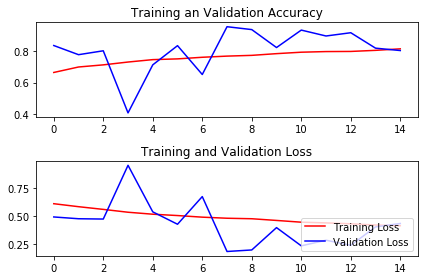

In [117]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.subplot(2,1,1)
plt.plot(epochs,acc,'r',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = "Validation Accuracy)")
plt.title('Training an Validation Accuracy')

plt.subplot(2,1,2)
plt.plot(epochs,loss,'r',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.legend(loc = 'lower right')

We can see that the training accuracy was a little sparse but still trended upwards. The validation accuracy was on a constant positive slope. They both converged around 13 epochs.

Similarly, bot training and validation loss trended downward and converged at 13 epochs. 

This suggests there isnt really any overfitting or underfitting being done.

## Prediction

Lets choose an image from the current directory that out model can predict on. This methos only allows one file to be selected

In [118]:
from ipyfilechooser import FileChooser

fc=FileChooser(os.getcwd())
display(fc)

FileChooser(path='C:\Users\Srikar\Desktop\Jupyter Notebooks', filename='', show_hidden='False')

In [129]:
import numpy as np
from keras.preprocessing import image

img = image.load_img(fc.selected, target_size = (150,150))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)

result = model.predict(x)
if result > 0.5:
    print(fc.selected_filename + " is a Dog")
else:
    print(fc.selected_filename + " is a Cat")

greynose_pitbull.jpg is a Dog
